# Sanity Checks Benchexec
This notebook is to check the sanity of the data (e.g., is there a deviation from two runs of the same tool)

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

In [131]:
def get_df(csv_file):
    df = pd.read_csv(os.path.join(root_path, csv_file), delimiter="\t", skiprows=2)
    df.rename(columns=rename_columns, inplace=True)
    df.set_index("id", inplace=True)
    if "prp" in csv_file:
        df["status"] = np.where(df["status"]=='true', True, False)
    #TODO split id into domains
    return df

## Replication
Check if two runs of the same solver yield similar results

In [201]:
prp_1_file = "results/benchmark-fond-prp.2024-02-27_19-19-27.results.prp.csv"
prp_2_file = "results/benchmark-fond-prp.2024-02-28_02-46-46.results.prp.csv"

prp_1_file = "results_prp/benchmark-fond-prp.2024-02-23_20-47-51.results.prp.csv"
prp_2_file = "results_prp/benchmark-fond-prp.2024-02-24_08-32-48.results.prp.csv"

lpg_1_file = "results/benchmark-lpg.2024-02-24_18-38-54.results.lpg.csv"
lpg_2_file = "results/benchmark-lpg.2024-02-25_20-51-25.results.lpg.csv"

df_1 = get_df(prp_1_file)
df_2 = get_df(prp_2_file)

df = df_1.merge(df_2, how="inner", right_index = True, left_index = True)
df["time_diff"] = df["cputime_x"] - df["cputime_y"]
df = df.fillna(-1)

In [197]:
df.query("policy_size_x != policy_size_y").sort_values("cputime_x")

,status_x,cputime_x,walltime_x,memory_mb_x,policy_size_x,solve_time_x,translation_time_x,status_y,cputime_y,walltime_y,memory_mb_y,policy_size_y,solve_time_y,translation_time_y,time_diff
id,,,,,,,,,,,,,,,


In [198]:
df.query("policy_size_x != policy_size_y and status_x == status_y and status_x == True").sort_values("solve_time_y")

,status_x,cputime_x,walltime_x,memory_mb_x,policy_size_x,solve_time_x,translation_time_x,status_y,cputime_y,walltime_y,memory_mb_y,policy_size_y,solve_time_y,translation_time_y,time_diff
id,,,,,,,,,,,,,,,


In [202]:
df.query("status_x == status_y and status_x == True and abs(time_diff)>100").sort_values("time_diff")

,status_x,cputime_x,walltime_x,memory_mb_x,policy_size_x,solve_time_x,translation_time_x,status_y,cputime_y,walltime_y,memory_mb_y,policy_size_y,solve_time_y,translation_time_y,time_diff
id,,,,,,,,,,,,,,,
AIJ_ZenoTravel_SCC56_10.yml,True,828.470781,828.637831,447.864832,17487.0,827.803491,0.442694,True,940.239641,940.384213,447.860736,17487.0,939.601033,0.419653,-111.768860
AIJ_BlocksWorld_SCC2-20_29.yml,True,960.012964,960.328195,1092.182016,17652.0,959.488392,0.473971,True,1063.093429,1063.311952,1092.300800,17652.0,1062.578306,0.454716,-103.080465


In [199]:
df.query("status_x == status_y and status_x == True and abs(time_diff)>100").sort_values("time_diff")

,status_x,cputime_x,walltime_x,memory_mb_x,policy_size_x,solve_time_x,translation_time_x,status_y,cputime_y,walltime_y,memory_mb_y,policy_size_y,solve_time_y,translation_time_y,time_diff
id,,,,,,,,,,,,,,,
AIJ_BlocksWorld_SCC2-20_20.yml,True,407.803916,408.003922,679.256064,7121.0,407.219645,0.407121,True,553.187640,553.314723,679.374848,7121.0,552.543374,0.416913,-145.383724
AIJ_Barman_SCC56_10.yml,True,1503.566141,1503.867466,165.736448,8427.0,1503.122723,0.404281,True,1615.617025,1615.959152,165.842944,8427.0,1615.318414,0.352106,-112.050884


Text(0.5, 1.0, 'PRP')

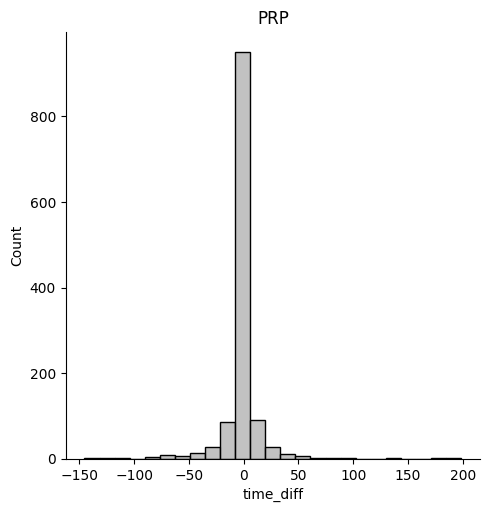

In [200]:
sns.displot(df, x="time_diff", bins=25, color="#aeaeae")
plt.title("PRP")

Text(0.5, 1.0, 'LPG')

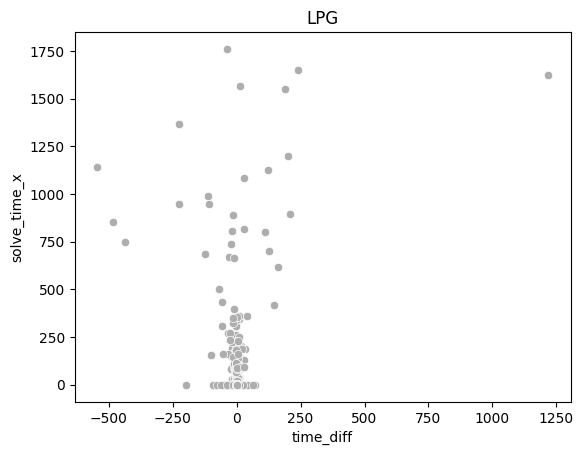

In [163]:
sns.scatterplot(df, y="solve_time_x", x="time_diff", color="#aeaeae")
plt.title("LPG")

## Files
There are 5 runs of the benchmarks.
1. LPG on AIJ and IJCAI tasks
2. PRP and PRP2 with no invariant analysis on the AIJ, IJCAI, FOND tasks
3. PRP and PRP2 with 300s invariant time limit on the AIJ, IJCAI, and FOND tasks

Please note that the FOND task for PRP was run separately due to space constraints on the drive.

In [124]:
root_path = os.path.expanduser("~/Work/Data/app")
lpg_file = "results_lpg/benchmark-lpg.2024-02-08_15-14-34.results.lpg.csv"
prp_0_file = "results_prp_inv0/benchmark-fond-prp.2024-02-09_08-04-31.results.prp.csv"
prp_0_fond_file = "results_prp_inv0_fond/benchmark-fond-prp.2024-02-09_14-01-15.results.prp.FOND.csv"
prp_300_file = "results_prp_inv300/benchmark-fond-prp.2024-02-10_10-43-22.results.prp.csv"
prp_300_2_file = "results/benchmark-fond-prp.2024-02-20_03-16-52.results.prp.csv"
prp_300_3_file = "results/benchmark-fond-prp.2024-02-20_22-17-55.results.prp.csv"
prp2_0_file = "results_prp2_inv0/benchmark-fond-prp2.2024-02-08_17-34-27.results.prp2.csv"
prp2_300_file = "results_prp2_inv300/benchmark-fond-prp2.2024-02-09_16-32-51.results.prp2.csv"

all_files = [lpg_file, prp_0_file, prp_0_fond_file, prp_300_file, prp2_0_file, prp2_300_file]

rename_columns = {"benchmarks/benchexe/tasks/": "id", "cputime (s)": "cputime", "walltime (s)": "walltime", "memory (MB)": "memory_mb"}


## Status and policy size
The policy size should be -1 for an unsolved instance.

In [77]:
for f in all_files:
    df = get_df(f)
    assert df.query("policy_size==-1 and status==True").size == 0

## Time and status
Check for timeouts

In [79]:
for f in all_files:
    df = get_df(f)
    print(f"Processing file {f}")
    max_time =  df["cputime"].max()
    max_solved_time = df.query("status==True")["cputime"].max()
    print(f"max time: {max_time}")
    print(f"max solved time: {max_solved_time}")
    assert df.query("cputime > @max_solved_time and status==True").size == 0

Processing file results_lpg/benchmark-lpg.2024-02-08_15-14-34.results.lpg.csv
max time: 1853.09621
max solved time: 1705.813515
Processing file results_prp_inv0/benchmark-fond-prp.2024-02-09_08-04-31.results.prp.csv
max time: 3599.736535
max solved time: 3253.660824
Processing file results_prp_inv0_fond/benchmark-fond-prp.2024-02-09_14-01-15.results.prp.FOND.csv
max time: 3599.50056
max solved time: 2061.393008
Processing file results_prp_inv300/benchmark-fond-prp.2024-02-10_10-43-22.results.prp.csv
max time: 3599.65492
max solved time: 3186.548063
Processing file results_prp2_inv0/benchmark-fond-prp2.2024-02-08_17-34-27.results.prp2.csv
max time: 3599.782956
max solved time: 3582.889765
Processing file results_prp2_inv300/benchmark-fond-prp2.2024-02-09_16-32-51.results.prp2.csv
max time: 3599.767144
max solved time: 3451.257514


## Memory and status
Check for exceeding memory limit

In [82]:
for f in all_files:
    df = get_df(f)
    print(f"Processing file {f}")
    max_memory =  df["memory_mb"].max()
    max_solved_memory = df.query("status==True")["memory_mb"].max()
    print(f"max memory: {max_memory}")
    print(f"max solved memory: {max_solved_memory}")
    assert df.query("memory_mb > @max_solved_memory and status==True").size == 0

Processing file results_lpg/benchmark-lpg.2024-02-08_15-14-34.results.lpg.csv
max memory: 1339.531264
max solved memory: 1005.969408
Processing file results_prp_inv0/benchmark-fond-prp.2024-02-09_08-04-31.results.prp.csv
max memory: 2048.0
max solved memory: 2046.337024
Processing file results_prp_inv0_fond/benchmark-fond-prp.2024-02-09_14-01-15.results.prp.FOND.csv
max memory: 2048.0
max solved memory: 1985.327104
Processing file results_prp_inv300/benchmark-fond-prp.2024-02-10_10-43-22.results.prp.csv
max memory: 2048.0
max solved memory: 1966.067712
Processing file results_prp2_inv0/benchmark-fond-prp2.2024-02-08_17-34-27.results.prp2.csv
max memory: 2048.0
max solved memory: 986.001408
Processing file results_prp2_inv300/benchmark-fond-prp2.2024-02-09_16-32-51.results.prp2.csv
max memory: 2048.0
max solved memory: 920.71936


## LPG Solver
LPG solver has a maximum time of 1853s. Needs investigating as the maximum time limit was 3600

In [85]:
df = get_df(lpg_file)
df.query(f"status==False")

,status,cputime,walltime,memory_mb,policy_size,solve_time,translation_time
id,,,,,,,
AIJ_Barman_EIGHT50_20.yml,False,1800.604284,1801.793812,552.935424,-1.0,1800.878216,0.264323
AIJ_Barman_RND50_11.yml,False,834.097448,834.456957,396.005376,-1.0,833.513425,0.396414
AIJ_Barman_RND50_12.yml,False,1082.150081,1082.738644,434.806784,-1.0,1081.980065,0.278016
AIJ_Barman_RND50_13.yml,False,1019.853906,1022.053233,419.217408,-1.0,1021.269161,0.293084
AIJ_Barman_RND50_14.yml,False,1800.697530,1801.812109,474.169344,-1.0,1800.760114,0.392002
...,...,...,...,...,...,...,...
IJCAI_Woodworking_14.yml,False,791.634939,791.994368,463.835136,-1.0,791.155072,0.292552
IJCAI_Woodworking_15.yml,False,1804.487993,1804.983364,556.933120,-1.0,1804.091180,0.320622
IJCAI_Woodworking_16.yml,False,844.437171,844.820248,462.594048,-1.0,843.757113,0.426202
